In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import BeamSection module from FlightBEND
from FlightBEND.beam_section import BeamSection

In [2]:
# Import mesh: Ratio a/b = 5; Element type Q9; Mesh with 196 elements
from meshes.MultMat_circ_Q9_400e  import dados as data

## Unpacking mesh data
secNodes    = data['coordinates'] 
secElems    = data['elements']
secYoung    = data['materials'][:,0].copy()
secNu       = np.ones(data['materials'][:,1].shape) * 0.3   # Set all elements' poisson's ration equal to 0.3
secRho      = np.ones(data['materials'][:,2].shape) * 1     # Set all elements' density to one

# Ratio between moduli (Vary from 1 to 5 to reproduce data from Fig 6)
c           = 3 
# Change righthand-side material Young modulus
secYoung[np.where(data['materials'][:,0]>70e3)] = c*70e3

# Instancing BeamSection object
sec = BeamSection(coordinates=secNodes,connectivity=secElems,young=secYoung,nu=secNu,rho=secRho)

# Twist rate [rad/m]
rate = np.radians(0.05)/10


# Center of twist and modulus-weighted center of gravity
Y_CT = sec.areaProperties['Y_CT']
Z_CT = sec.areaProperties['Z_CT']
Y_CG = sec.areaProperties['Y_CG_weighted']
Z_CG = sec.areaProperties['Z_CG_weighted']

print(f'{ Y_CT = :.4e}, { Z_CT = :.4e}')
print(f'{ Y_CG = :.4e}, { Z_CG = :.4e}')
print('')
print(f'Nodes per element:      {len(  secElems[0,:]): 12d}')
print(f'Number of elements:     {len(  secElems[:,0]): 12d}')
print(f'Number of nodes:        {len(  secNodes[:,0]): 12d}')
print(f'Max. warping:           {np.max(sec.displacements*rate): 12.5e} mm')
print(f'Min. warping:           {np.min(sec.displacements*rate): 12.5e} mm')
print(f'Tonsional constant:     {sec.areaProperties["torsionalConstant"]: 12.5e} mm^4')
print(f'Quadrature degreee:     {sec.intDegree : 12d}')

 Y_CT = 3.1366e+01,  Z_CT = 2.5000e+01
 Y_CG = 3.0305e+01,  Z_CG = 2.5000e+01

Nodes per element:                 9
Number of elements:              400
Number of nodes:                1681
Max. warping:            4.79390e-03 mm
Min. warping:           -4.79391e-03 mm
Tonsional constant:      6.79907e+05 mm^4
Quadrature degreee:                4


(0.0, 50.0, 0.0, 50.0)

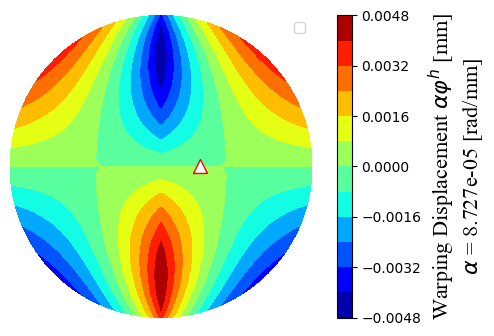

In [3]:
# Maximum and minumum displacement values from ABAQUS
vmax =  4.820e-3
vmin = -4.820e-3

fig, ax = sec.plotWarping(levels=12, showMesh=False, showCG=False, fig_num=2, unit='mm', twistRate=rate, vmax=vmax,vmin=vmin)
ax.legend([])
ax.axis('off')